**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

#Project Lasso Regression to predict breast cancer
In this project, you will evaluate the features of a dataset to train linear regression and lasso regression models.  
Please reference the video lecture on Lasso Regression for a description of this example dataset and the main functions you will need in the implementation.
Please complete the following steps in your Colab Script.  The reference script below provides template code and hints to help with each step.  
Note, in the lecture and in most literature, the Lasso regression regularization parameter is denoted as "lambda", but in the sklearn model, it is called "alpha".

-  **Step 1**:  Download the dataset file from the Github repository for this course (the link is provided in the materials document in the LMS).  Upload the file to your Colab files folder so that you can access it from your script. Read in the provided csv file: "BreastCancerDataset.csv" into a pandas dataframe.  Note the dataset has been prepared to include all the features used in the study as well as a "Diagnosis" column.  You MUST use this file in your project.
-  **Step 2**:  Inspect the dataset, note the features (indep vars) and the result (last column). Drop any unwanted rows or columns from the dataframe (e.g. 'unnamed')
-  **Step 3**:  Read the features (all but the 'Diagnosis' column) into a numpy array.
-  **Step 4**:  Read the results column ('Diagnosis') into the Y variable
-  **Step 5**:  Create a training and test split of 70% train and 30% test from the dataset. Use a random_state of 31.
-  **Step 6**:  Train the Lasso algorithm, using the default fit function (alpha=1.0).  Note that "alpha" in the sklearn model is equivalent to the lecture "lambda".
-  **Step 7**:  Calculate the train and test scores.
-  **Step 8**:  Find the number of non-0 coefficients used.
-  **Step 9**:  Print out the results for the scores and number of coeffs used.
-  **Step 10**: Repeat steps 6-9 for alpha= 0.5, 0.05
-  **Step 11**: Run with Linear regression (alpha=0)
-  **Step 12**: Visualize your output on a Matplotlib graph of Coefficient Magnitudes vs. Coefficient Index for each of the regression equation models computed above.
-  **Step 13**: Find the optimum value for alpha.  Please reference the lecture on guidelines on how to evaluate when an alpha (lambda) value is trending towards overfitting or underfitting the dataset.

Train score:  0.5600974529893081
Test score:  0.5832244618818156
Number of non zero coefficients:  4
Number of coefficients:  30


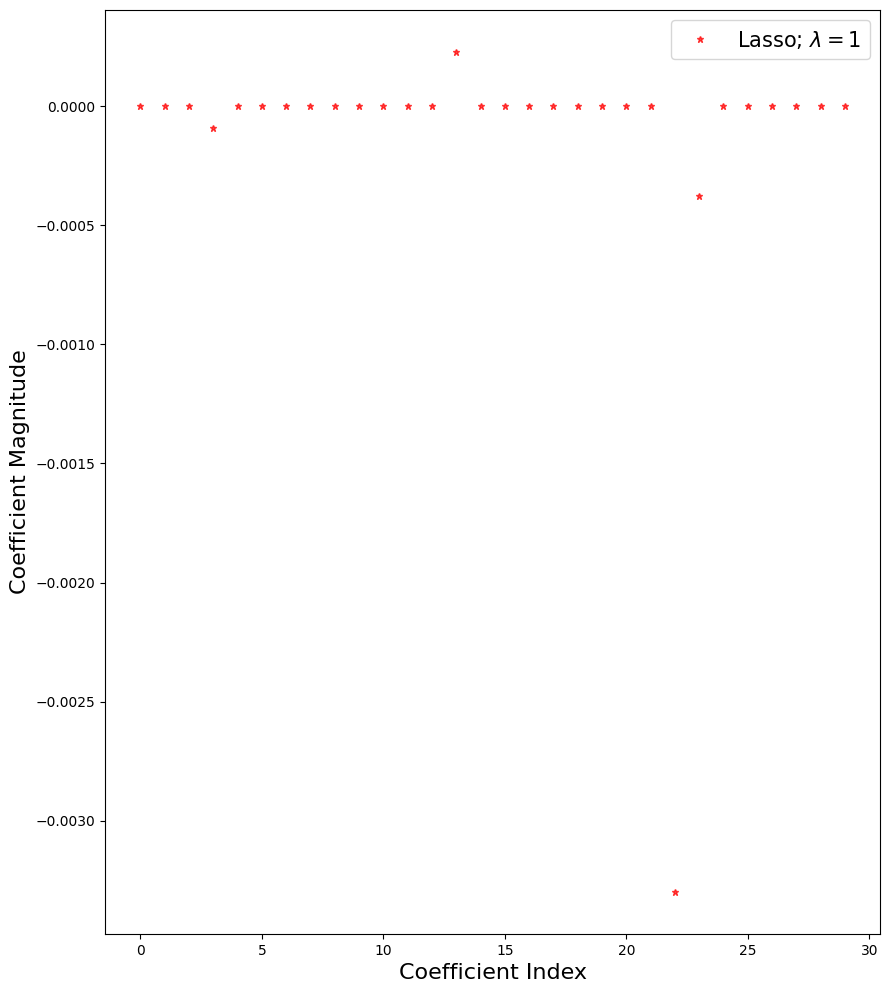

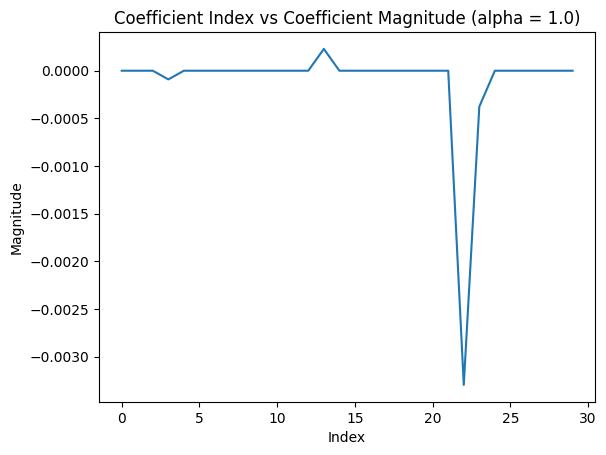

Train score:  0.6281936876635015
Test score:  0.6336653433914584
Number of non zero coefficients:  5
Number of coefficients:  30


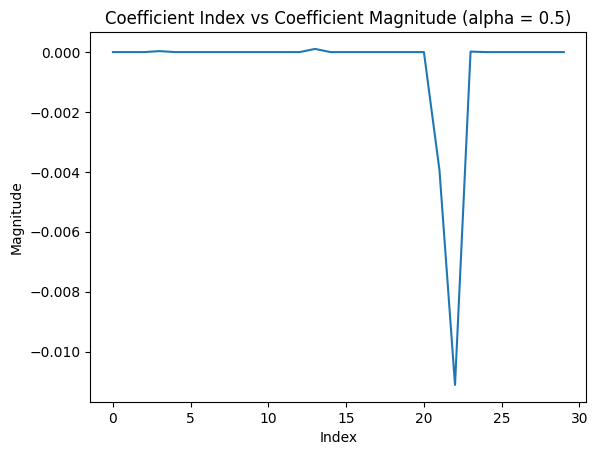

Train score:  0.6776243757868943
Test score:  0.654247093235867
Number of non zero coefficients:  6
Number of coefficients:  30


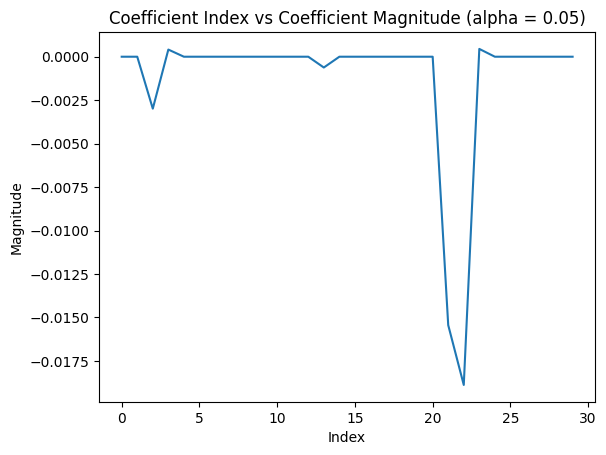

Train score:  0.7842206194055069
Test score:  0.732932501088867
Number of non zero coefficients:  30
Number of coefficients:  30


In [ ]:
#Project Lasso Regression to predict breast cancer
#https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

#Import the libraries
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Read the project dataset.
#Step 1:  Download the dataset
#         Upload the file to your Colab files folder so that you can access it
#         from your script. Read in the provided csv file: "BreastCancerDataset.csv"
#         into a pandas dataframe.  Note the dataset has been prepared to include all
#         the features used in the study as well as a "Result" column.
#         You MUST use this file in your project.

# TODO:  Your code here...

data = pd.read_csv('/content/BreastCancerDataset.csv')


#Step 2:  Inspect the dataset, note the features (indep vars) and the result (last column).
#         Hint:  use the Pandas 'drop' function to remove unwanted rows or columns from the dataframe.
# TODO:  Your code here...

data.head(10)

data = data.drop(columns = ['Unnamed: 0'])

#Step 3:  Read the features (all but then 'Result' column) into a numpy array.
#         Hint:  Create a column headers array and use that with the Pandas to_numpy() function to create the independent variable X.
#Step 4:  Read the results column ('Result') into the Y variable
#         Hint:  Use the Pandas 'values function or to_numpy() to return a numpy representation of the Result column into a dependent variable Y
# TODO:  Your code here...

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

#Step 5:  Create a training and test split of 70% train and 30% test from the dataset. Use a random_state of 31.
# TODO:  Your code here...

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 31)

#Step 6:  Train the Lasso algorithm, using the default fit function (alpha=1.0).
#         Note that "alpha" in the sklearn model is equivalent to the lecture "lambda".
#         Hint:  Remember to instantiate the 'Lasso' object before training your model.
#Step 7:  Calculate the train and test scores.
#Step 8:  Find the number of non-0 coefficients used.
#Step 9:  Print out the results for the scores and number of coeffs used.
# TODO:  Your code here...

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train,y_train)
print("Train score: ",lasso.score(X_train,y_train))
print("Test score: ",lasso.score(X_test,y_test))
print("Number of non zero coefficients: ",len(list(filter(lambda x: x != 0, lasso.coef_))))
print("Number of coefficients: ", len(lasso.coef_))

#Step 12: Visualize your ouput on a Matplotlib graph of Coefficient Magnitudes vs. Coefficient Index
#         for each of the regression equation models computed above.
#         Hint:  the following code will create a figure and plot the coefficients for a group of coefficients.
plt.figure(figsize=(10,12))
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\lambda = 1$',zorder=7)
#TODO: Add your other cases here
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=15,loc='best')
plt.show()

plt.plot(range(len(lasso.coef_)),lasso.coef_)
plt.title('Coefficient Index vs Coefficient Magnitude (alpha = 1.0)')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.show()

lasso2 = Lasso(alpha=0.5)
lasso2.fit(X_train,y_train)
print("Train score: ",lasso2.score(X_train,y_train))
print("Test score: ",lasso2.score(X_test,y_test))
print("Number of non zero coefficients: ",len(list(filter(lambda x: x != 0, lasso2.coef_))))
print("Number of coefficients: ", len(lasso2.coef_))

plt.plot(range(len(lasso2.coef_)),lasso2.coef_)
plt.title('Coefficient Index vs Coefficient Magnitude (alpha = 0.5)')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.show()

lasso3 = Lasso(alpha=0.05)
lasso3.fit(X_train,y_train)
print("Train score: ",lasso3.score(X_train,y_train))
print("Test score: ",lasso3.score(X_test,y_test))
print("Number of non zero coefficients: ",len(list(filter(lambda x: x != 0, lasso3.coef_))))
print("Number of coefficients: ", len(lasso3.coef_))

plt.plot(range(len(lasso3.coef_)),lasso3.coef_)
plt.title('Coefficient Index vs Coefficient Magnitude (alpha = 0.05)')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.show()


#Step 13: Find the optimum value for alpha.
#         Please reference the lecture on guidelines on how to evaluate when an alpha (lambda)
#         value is trending towards overfitting or underfitting the dataset.
# TODO:  Your code here...
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)
print("Train score: ",linear.score(X_train,y_train))
print("Test score: ",linear.score(X_test,y_test))
print("Number of non zero coefficients: ",len(list(filter(lambda x: x != 0, linear.coef_))))
print("Number of coefficients: ", len(linear.coef_))


